# Corelation matrices for 3 types of data
We are here using the table EV3 from the second paper. 
Here is the README:
Tissue specific mRNA (median across replicates, FPKM-log10), protein (iBAQ-log10) measurements and protein-to-mRNA ratios (log10) of 11,575 transcripts considered in the study. Values that are 0 in natural scale, and FPKM values smaller than 1 in log10 scale are encoded as missing values (NA).
We first draw correlation maps, along with PCA for every three table. 


In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

newFrame=pd.read_csv('Table_EV3/Table_EV3.csv')

subFrame=newFrame.iloc[:,4:-1].copy()
# 
# 
subFrame = subFrame.replace('NA', np.nan, regex=True)                    
                         

# subFrame.plot()
# plt.gca().legend_.remove()
# plt.savefig('Concentration.png')
# plt.show()



In [60]:
# subFrame=subFrame.astype('float64)
# subFrame=subFrame.fillna(0)
# subFrame=subFrame.astype('float64)
subFrame.head(5)

subFrame=subFrame.apply(pd.to_numeric)
mRNA_cols = [col for col in subFrame.columns if '_mRNA' in col]

PTR_cols = [col for col in subFrame.columns if '_PTR' in col]
protein_cols = [col for col in subFrame.columns if '_protein' in col]
len(mRNA_cols)

Adrenal_mRNA  Appendices_mRNA  Brain_mRNA  Colon_mRNA  Duodenum_mRNA  \
0           NaN            1.073         NaN         NaN            NaN   
1           NaN              NaN         NaN       1.971          2.324   
2         3.154            3.021       2.824       3.321          3.006   
3           NaN              NaN       1.355         NaN            NaN   
4         1.625            1.567         NaN         NaN            NaN   

   Endometrium_mRNA  Esophagus_mRNA  Fallopiantube_mRNA  Fat_mRNA  \
0               NaN             NaN               1.054       NaN   
1               NaN             NaN                 NaN       NaN   
2             3.344           3.412               2.659     3.653   
3               NaN           3.248                 NaN       NaN   
4               NaN           1.691               1.564       NaN   

   Gallbladder_mRNA  ...  Prostate_PTR  Rectum_PTR  Salivarygland_PTR  \
0               NaN  ...           NaN         NaN              7.718   
1             1.569  ...           NaN       5.147                NaN   
2             3.569  ...          5.68       6.081              5.726   
3               NaN  ...           NaN         NaN                NaN   
4               NaN  ...           NaN       4.731              4.508   

   Smallintestine_PTR  Smoothmuscle_PTR  Spleen_PTR  Stomach_PTR  Testis_PTR  \
0                 NaN               NaN       7.313          NaN         NaN   
1               5.202               NaN         NaN       5.8143         NaN   
2               5.699             4.997       5.136       6.5349       5.820   
3                 NaN               NaN         NaN          NaN       2.350   
4                 NaN               NaN         NaN       4.0613       4.832   

   Thyroid_PTR  Tonsil_PTR  
0          NaN         NaN  
1          NaN         NaN  
2         6.06       5.675  
3          NaN       5.249  
4          NaN         NaN  

[5 rows x 86 columns]

29

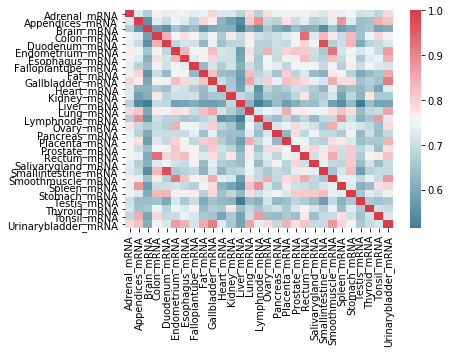

In [35]:
import seaborn as sns

corr = subFrame.loc[:,mRNA_cols].corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmapmRNA.png', dpi=400)

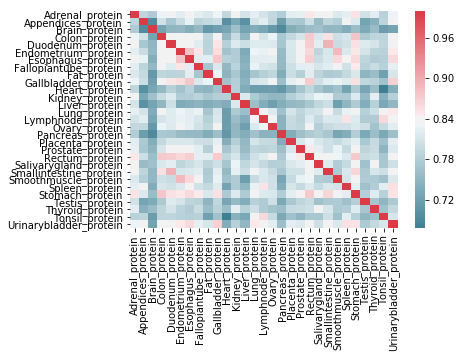

In [36]:
import seaborn as sns

corr = subFrame.loc[:,protein_cols].corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmapProtein.png', dpi=400)

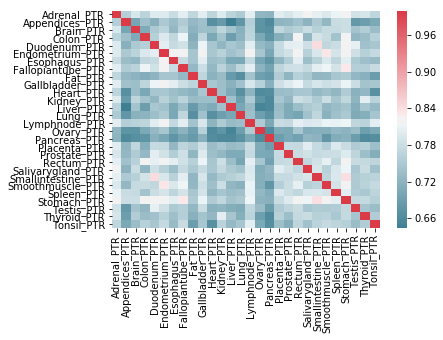

In [37]:
import seaborn as sns

corr = subFrame.loc[:,PTR_cols].corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmapPTR.png', dpi=400)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 19 artists>

Text(0, 0.5, 'Percentage of Explained Variance')

Text(0.5, 0, 'Principal Component')

Text(0.5, 1.0, 'Scree Plot')

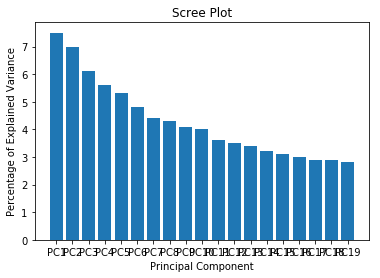

In [53]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
data=subFrame.loc[:,PTR_cols]
inp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data=inp_mean.fit_transform(data)
scaled_data = preprocessing.scale(data.T)

pca = PCA(0.80) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCExplainedVariancePTR.png')
plt.show()



Text(0.5, 1.0, 'My PCA Graph')

Text(0.5, 0, 'PC1 - 7.5%')

Text(0, 0.5, 'PC2 - 7.0%')

Text(20.27157009524917, -13.369649377622252, 'Adrenal_PTR')

Text(-51.79879107408483, 5.210942414017812, 'Appendices_PTR')

Text(81.18684070420998, -54.90538887296844, 'Brain_PTR')

Text(-15.358054638315116, 21.189798854448217, 'Colon_PTR')

Text(7.456670579493422, 29.91528521310804, 'Duodenum_PTR')

Text(15.804234709277091, 18.213848627611448, 'Endometrium_PTR')

Text(-24.504996461047778, 0.6755266229500071, 'Esophagus_PTR')

Text(20.427924719750237, 28.589820024907098, 'Fallopiantube_PTR')

Text(-62.679429845902426, -43.69194346972924, 'Fat_PTR')

Text(-11.5998582976061, 14.928871522882647, 'Gallbladder_PTR')

Text(-14.032666007240323, -54.835653956389635, 'Heart_PTR')

Text(10.097372429081561, -58.42140126206324, 'Kidney_PTR')

Text(-32.02031729663304, -28.033899981199152, 'Liver_PTR')

Text(22.170924821076675, 59.12950248072755, 'Lung_PTR')

Text(-3.730591139000021, 13.45579628066759, 'Lymphnode_PTR')

Text(-21.369724569694007, 22.776070474905676, 'Ovary_PTR')

Text(-47.92908807068393, 4.386312191418013, 'Pancreas_PTR')

Text(6.600826883215739, -0.6532533113699538, 'Placenta_PTR')

Text(6.638195462843795, 1.9576801774291688, 'Prostate_PTR')

Text(1.7461419206990527, -2.2230649946429573, 'Rectum_PTR')

Text(6.762642866890384, -18.91715720763715, 'Salivarygland_PTR')

Text(2.9345065969870685, 31.036357378386597, 'Smallintestine_PTR')

Text(21.386108102428164, -3.20923645094946, 'Smoothmuscle_PTR')

Text(-8.397024091056348, 2.3288298161843457, 'Spleen_PTR')

Text(5.394364460282656, 10.472137216490292, 'Stomach_PTR')

Text(54.02790133048027, 21.421206874062836, 'Testis_PTR')

Text(25.00421168624448, -29.42477303862633, 'Thyroid_PTR')

Text(-14.489895876945889, 21.997435753000495, 'Tonsil_PTR')

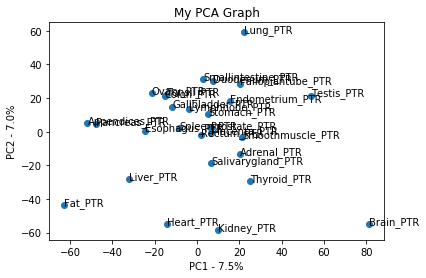

In [61]:
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=PTR_cols, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.savefig('PCAdim2PTR.png')
plt.show()



In [26]:
#code for CodonTable fonction 
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC", IUPAC.unambiguous_dna)


# def CodonTo64 (my_seq):
#     CodonsDict = { 
#     "TTT": 0, "TTC": 1, "TTA": 2, "TTG": 3, "CTT": 4, 
#     "CTC": 5, "CTA": 6, "CTG": 7, "ATT": 8, "ATC": 9, 
#     "ATA": 10, "ATG": 11, "GTT": 12, "GTC": 13, "GTA": 14, 
#     "GTG": 15, "TAT": 16, "TAC": 17, "TAA": 18, "TAG": 19, 
#     "CAT": 20, "CAC": 21, "CAA": 22, "CAG": 23, "AAT": 24, 
#     "AAC": 25, "AAA": 26, "AAG": 27, "GAT": 28, "GAC": 29, 
#     "GAA": 30, "GAG": 31, "TCT": 32, "TCC": 33, "TCA": 34, 
#     "TCG": 35, "CCT": 36, "CCC": 37, "CCA": 38, "CCG": 39, 
#     "ACT": 40, "ACC": 41, "ACA": 42, "ACG": 43, "GCT": 44, 
#     "GCC": 45, "GCA": 46, "GCG": 37, "TGT": 38, "TGC": 49, 
#     "TGA": 50, "TGG": 51, "CGT": 52, "CGC": 53, "CGA": 54, 
#     "CGG": 55, "AGT": 56, "AGC": 57, "AGA": 58, "AGG": 59, 
#     "GGT": 60, "GGC": 61, "GGA": 62, "GGG": 63} 
#     output =[]
#     list_nucleotides =[my_seq[i:i+3] for i in range(0, len(my_seq), 3)]
#     NumberCodons=0     
#     for nucleotide in list_nucleotides:
#         if not nucleotide in CodonsDict:
#             continue

#         else:
#             output.append(CodonsDict[nucleotide])
#             NumberCodons+=1
#     output=np.array(output)
#     return output

# print(CodonTo64(my_seq))



def CodonTo64 (my_seq):
    CodonsDict = { 
    "TTT": 0, "TTC": 1, "TTA": 2, "TTG": 3, "CTT": 4, 
    "CTC": 5, "CTA": 6, "CTG": 7, "ATT": 8, "ATC": 9, 
    "ATA": 10, "ATG": 11, "GTT": 12, "GTC": 13, "GTA": 14, 
    "GTG": 15, "TAT": 16, "TAC": 17, "TAA": 18, "TAG": 19, 
    "CAT": 20, "CAC": 21, "CAA": 22, "CAG": 23, "AAT": 24, 
    "AAC": 25, "AAA": 26, "AAG": 27, "GAT": 28, "GAC": 29, 
    "GAA": 30, "GAG": 31, "TCT": 32, "TCC": 33, "TCA": 34, 
    "TCG": 35, "CCT": 36, "CCC": 37, "CCA": 38, "CCG": 39, 
    "ACT": 40, "ACC": 41, "ACA": 42, "ACG": 43, "GCT": 44, 
    "GCC": 45, "GCA": 46, "GCG": 37, "TGT": 38, "TGC": 49, 
    "TGA": 50, "TGG": 51, "CGT": 52, "CGC": 53, "CGA": 54, 
    "CGG": 55, "AGT": 56, "AGC": 57, "AGA": 58, "AGG": 59, 
    "GGT": 60, "GGC": 61, "GGA": 62, "GGG": 63} 
    output =[]
    list_nucleotides =[my_seq[i:i+3] for i in range(0, len(my_seq), 3)]
    NumberCodons=0     
    for nucleotide in list_nucleotides:
        if not nucleotide in CodonsDict:
            continue

        else:
            output.append(CodonsDict[nucleotide])
            NumberCodons+=1

    return output

print(CodonTo64(my_seq))

[28, 54, 51, 45, 16, 10, 62, 35, 26, 9]


In [27]:
SeqFrame=pd.read_csv('Table_EV4/Table_EV4.csv' )
CodonTo64(SeqFrame['CDS_Sequence'][0])
X=[CodonTo64(CDS) for CDS in SeqFrame['CDS_Sequence']]
X

[41,
 61,
 38,
 42,
 30,
 46,
 45,
 31,
 43,
 23,
 37,
 57,
 46,
 31,
 30,
 26,
 37,
 45,
 43,
 43,
 23,
 45,
 21,
 31,
 38,
 29,
 23,
 27,
 63,
 45,
 23,
 31,
 21,
 29,
 45,
 27,
 21,
 23,
 43,
 29,
 41,
 23,
 61,
 53,
 53,
 53,
 61,
 42,
 62,
 41,
 23,
 57,
 27,
 31,
 42,
 63,
 38,
 27,
 37,
 37,
 38,
 41,
 37,
 61,
 26,
 42,
 42,
 46,
 54,
 55,
 59,
 55,
 31,
 61,
 29,
 31,
 31,
 31,
 45,
 23,
 31,
 31,
 45,
 41,
 38,
 23,
 61,
 25,
 57,
 57,
 55,
 41,
 63,
 30,
 61,
 45,
 31,
 37,
 57,
 41,
 31,
 31,
 46,
 38,
 38,
 39,
 21,
 62,
 31,
 23,
 21,
 61,
 25,
 27,
 41,
 41,
 37,
 62,
 29,
 23,
 55,
 53,
 63,
 31,
 26,
 31,
 37,
 59,
 57,
 57,
 41,
 57,
 38,
 53,
 21,
 25,
 37,
 45,
 63,
 62,
 21,
 41,
 53,
 55,
 29,
 25,
 22,
 25,
 61,
 63,
 29,
 57,
 37,
 39,
 31,
 57,
 31,
 43,
 37,
 37,
 39,
 31,
 39,
 31,
 39,
 31,
 61,
 59,
 45,
 55,
 55,
 37,
 37,
 31,
 61,
 37,
 53,
 45,
 53,
 31,
 29,
 59,
 61,
 63,
 53,
 53,
 21,
 23,
 57,
 37,
 63,
 41,
 31,
 37,
 31,
 21,
 25,
 29,
 45,
 25,


[[41,
  61,
  38,
  42,
  30,
  46,
  45,
  31,
  43,
  23,
  37,
  57,
  46,
  31,
  30,
  26,
  37,
  45,
  43,
  43,
  23,
  45,
  21,
  31,
  38,
  29,
  23,
  27,
  63,
  45,
  23,
  31,
  21,
  29,
  45,
  27,
  21,
  23,
  43,
  29,
  41,
  23,
  61,
  53,
  53,
  53,
  61,
  42,
  62,
  41,
  23,
  57,
  27,
  31,
  42,
  63,
  38,
  27,
  37,
  37,
  38,
  41,
  37,
  61,
  26,
  42,
  42,
  46,
  54,
  55,
  59,
  55,
  31,
  61,
  29,
  31,
  31,
  31,
  45,
  23,
  31,
  31,
  45,
  41,
  38,
  23,
  61,
  25,
  57,
  57,
  55,
  41,
  63,
  30,
  61,
  45,
  31,
  37,
  57,
  41,
  31,
  31,
  46,
  38,
  38,
  39,
  21,
  62,
  31,
  23,
  21,
  61,
  25,
  27,
  41,
  41,
  37,
  62,
  29,
  23,
  55,
  53,
  63,
  31,
  26,
  31,
  37,
  59,
  57,
  57,
  41,
  57,
  38,
  53,
  21,
  25,
  37,
  45,
  63,
  62,
  21,
  41,
  53,
  55,
  29,
  25,
  22,
  25,
  61,
  63,
  29,
  57,
  37,
  39,
  31,
  57,
  31,
  43,
  37,
  37,
  39,
  31,
  39,
  31,
  39,
  31,
  61

In [28]:
Xintput=np.array(X)

In [30]:
Xintput

array([list([41, 61, 38, 42, 30, 46, 45, 31, 43, 23, 37, 57, 46, 31, 30, 26, 37, 45, 43, 43, 23, 45, 21, 31, 38, 29, 23, 27, 63, 45, 23, 31, 21, 29, 45, 27, 21, 23, 43, 29, 41, 23, 61, 53, 53, 53, 61, 42, 62, 41, 23, 57, 27, 31, 42, 63, 38, 27, 37, 37, 38, 41, 37, 61, 26, 42, 42, 46, 54, 55, 59, 55, 31, 61, 29, 31, 31, 31, 45, 23, 31, 31, 45, 41, 38, 23, 61, 25, 57, 57, 55, 41, 63, 30, 61, 45, 31, 37, 57, 41, 31, 31, 46, 38, 38, 39, 21, 62, 31, 23, 21, 61, 25, 27, 41, 41, 37, 62, 29, 23, 55, 53, 63, 31, 26, 31, 37, 59, 57, 57, 41, 57, 38, 53, 21, 25, 37, 45, 63, 62, 21, 41, 53, 55, 29, 25, 22, 25, 61, 63, 29, 57, 37, 39, 31, 57, 31, 43, 37, 37, 39, 31, 39, 31, 39, 31, 61, 59, 45, 55, 55, 37, 37, 31, 61, 37, 53, 45, 53, 31, 29, 59, 61, 63, 53, 53, 21, 23, 57, 37, 63, 41, 31, 37, 31, 21, 25, 29, 45, 25, 57, 29, 27, 39, 63, 61, 37, 37, 57, 31, 53, 31, 21, 29, 62, 37, 37, 59, 23, 55, 37, 43, 63, 37, 37, 61, 54, 45, 53, 31, 62, 37, 37, 29, 41, 31, 53, 31, 61, 31, 43, 27, 45, 27, 43, 53, 41,